<a href="https://colab.research.google.com/github/Saihaj-coder/Deep_Learning/blob/main/BERT_Sentiment_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/BERT_DATA/text_labels_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/BERT_DATA/text_labels_test.csv')
df_val = pd.read_csv('/content/drive/MyDrive/BERT_DATA/text_labels_val.csv')

In [5]:
print(df_train.shape, df_test.shape, df_val.shape)

(3711, 3) (464, 3) (464, 3)


In [ ]:
!pip install text_hammer

In [7]:
import text_hammer as th

In [8]:
df_full = pd.concat([df_train, df_test, df_val], axis=0)
df_full

,ID,tweet,label
0,865,Wednesday High pressure remains in charge yet ...,neutral
1,1706,The Dragon watching ... Beach Green Isolated ...,positive
2,3363,Via Reddit Final Fantasy IX Mistaken Love ReM...,positive
3,1346,Prayers JesusSaves NoOtherName Overcomer TeamJ...,positive
4,3188,USER so I have the new single on repeat and yo...,positive
...,...,...,...
459,4099,Happy patriot vs The angry Black woman USER N...,positive
460,4938,VdoBuzz \n,neutral
461,660,fishing Willow Strike Spinnerbait Colorado Ble...,positive
462,4838,.USER USER luke u sent me this same photo I'm...,negative


In [9]:
%%time

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df, col_name):
  column = col_name
  df[column] = df[column].progress_apply(lambda x:str(x).lower())
  df[column] = df[column].progress_apply(lambda x: th.cont_exp(x))
  df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
  df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))

  df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
  df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))

  return df

CPU times: user 2.15 ms, sys: 0 ns, total: 2.15 ms
Wall time: 6.55 ms


In [10]:
df_cleaned = text_preprocessing(df_full, 'tweet')

  0%|          | 0/4639 [00:00<?, ?it/s]

  0%|          | 0/4639 [00:00<?, ?it/s]

  0%|          | 0/4639 [00:00<?, ?it/s]

  0%|          | 0/4639 [00:00<?, ?it/s]

  0%|          | 0/4639 [00:00<?, ?it/s]

  0%|          | 0/4639 [00:00<?, ?it/s]

In [11]:
df_cleaned.head()

,ID,tweet,label
0,865,wednesday high pressure remains in charge yet ...,neutral
1,1706,the dragon watching beach green isolated morni...,positive
2,3363,via reddit final fantasy ix mistaken love remi...,positive
3,1346,prayers jesussaves noothername overcomer teamj...,positive
4,3188,user so i have the new single on repeat and yo...,positive


In [12]:
df_cleaned = df_cleaned.copy()

In [13]:
df_cleaned = df_cleaned.iloc[:, 1:]

In [14]:
df_cleaned.head()

,tweet,label
0,wednesday high pressure remains in charge yet ...,neutral
1,the dragon watching beach green isolated morni...,positive
2,via reddit final fantasy ix mistaken love remi...,positive
3,prayers jesussaves noothername overcomer teamj...,positive
4,user so i have the new single on repeat and yo...,positive


In [15]:
df_cleaned['num_words'] = df_cleaned.tweet.apply(lambda x:len(x.split()))

In [16]:
df_cleaned.head()

,tweet,label,num_words
0,wednesday high pressure remains in charge yet ...,neutral,16
1,the dragon watching beach green isolated morni...,positive,11
2,via reddit final fantasy ix mistaken love remi...,positive,13
3,prayers jesussaves noothername overcomer teamj...,positive,11
4,user so i have the new single on repeat and yo...,positive,19


In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4639 entries, 0 to 463
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      4639 non-null   object
 1   label      4639 non-null   object
 2   num_words  4639 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 145.0+ KB


In [18]:
df_cleaned['label'] = df_cleaned.label.astype('category')

In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4639 entries, 0 to 463
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   tweet      4639 non-null   object  
 1   label      4639 non-null   category
 2   num_words  4639 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 113.4+ KB


In [20]:
df_cleaned.label.unique()

['neutral', 'positive', 'negative']
Categories (3, object): ['negative', 'neutral', 'positive']

In [21]:
df_cleaned.label

0       neutral
1      positive
2      positive
3      positive
4      positive
         ...   
459    positive
460     neutral
461    positive
462    negative
463    positive
Name: label, Length: 4639, dtype: category
Categories (3, object): ['negative', 'neutral', 'positive']

In [22]:
df_cleaned.label.cat.codes

0      1
1      2
2      2
3      2
4      2
      ..
459    2
460    1
461    2
462    0
463    2
Length: 4639, dtype: int8

In [23]:
df_cleaned['label'] = df_cleaned.label.cat.codes
df_cleaned.label

0      1
1      2
2      2
3      2
4      2
      ..
459    2
460    1
461    2
462    0
463    2
Name: label, Length: 4639, dtype: int8

In [24]:
df_cleaned.head()

,tweet,label,num_words
0,wednesday high pressure remains in charge yet ...,1,16
1,the dragon watching beach green isolated morni...,2,11
2,via reddit final fantasy ix mistaken love remi...,2,13
3,prayers jesussaves noothername overcomer teamj...,2,11
4,user so i have the new single on repeat and yo...,2,19


In [25]:
df_cleaned.num_words.max()

30

In [26]:
value = df_train.shape[0]
data_train = df_cleaned.iloc[:value, :]
data_test = df_cleaned.iloc[value:value + 464, :]
data_val = df_cleaned.iloc[value + 464 : value + 928, :]

In [27]:
print(data_train.shape, data_test.shape, data_val.shape)

(3711, 3) (464, 3) (464, 3)


In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
data_train.head()

,tweet,label,num_words
0,wednesday high pressure remains in charge yet ...,1,16
1,the dragon watching beach green isolated morni...,2,11
2,via reddit final fantasy ix mistaken love remi...,2,13
3,prayers jesussaves noothername overcomer teamj...,2,11
4,user so i have the new single on repeat and yo...,2,19


In [30]:
to_categorical(data_train.label)

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
from transformers import AutoTokenizer, TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

In [32]:
tokenizer('Hello enjoy one life')

{'input_ids': [101, 8667, 5548, 1141, 1297, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [33]:
x_train = tokenizer(
    text = data_train.tweet.tolist(),
    add_special_tokens=True,
    max_length=40,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

x_test = tokenizer(
    text = data_test.tweet.tolist(),
    add_special_tokens=True,
    max_length=40,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

x_val = tokenizer(
    text = data_val.tweet.tolist(),
    add_special_tokens=True,
    max_length=40,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

In [34]:
x_train['input_ids']

<tf.Tensor: shape=(3711, 40), dtype=int32, numpy=
array([[  101, 26055,  3965, ...,     0,     0,     0],
       [  101,  1103,  7556, ...,     0,     0,     0],
       [  101,  2258,  1894, ...,     0,     0,     0],
       ...,
       [  101,  1716,  2513, ...,     0,     0,     0],
       [  101,  4795,  1440, ...,     0,     0,     0],
       [  101,  1139,   179, ...,     0,     0,     0]], dtype=int32)>

In [35]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

In [36]:
max_len=40

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense

input_ids = Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
input_mask = Input(shape=(max_len,), dtype=tf.int32, name='attention_mask')

embeddings = bert(input_ids, attention_mask=input_mask)[0]
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation='relu')(out)

y = Dense(3, activation='softmax')(out)

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable=True

In [37]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 40)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 40)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1083102   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   72         'attention_mask[0][0]']      
                             hidden_state=(None, 40, 76                                       

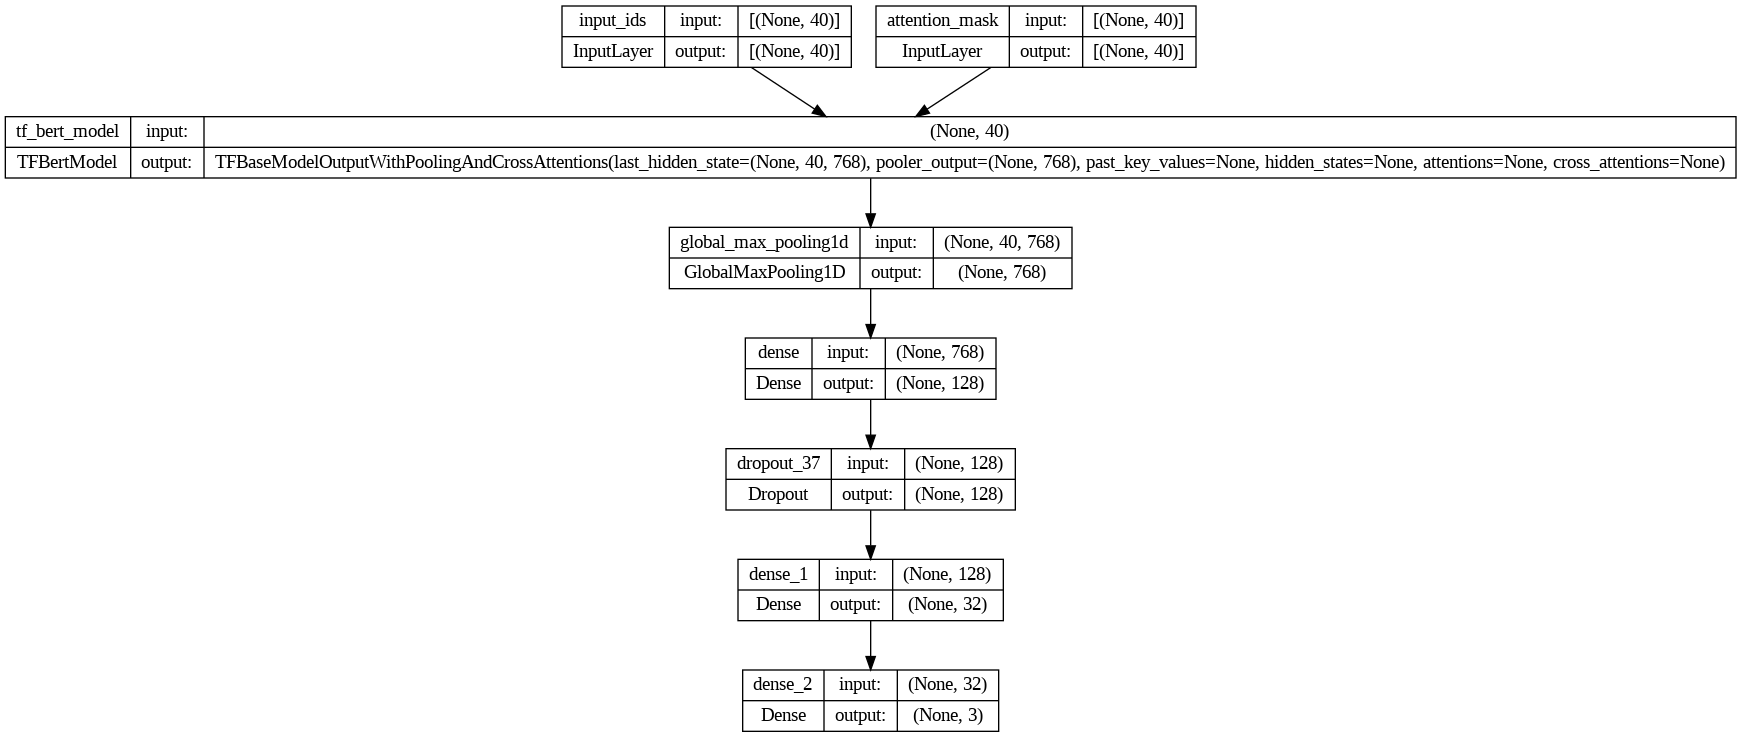

In [38]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [39]:
optimizer = Adam(
    learning_rate=5e-05,
    epsilon=1e-08,
    clipnorm=1.0)

model.compile(
    optimizer = optimizer,
    loss = CategoricalCrossentropy(from_logits=False),
    metrics=CategoricalAccuracy('balanced_accuracy'))

In [40]:
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [42]:
train_history = model.fit(
    x = {'input_ids':x_train['input_ids'], 'attention_mask':x_train['attention_mask']},
    y = to_categorical(data_train.label),
    validation_data = (
        {'input_ids': x_val['input_ids'], 'attention_mask':x_val['attention_mask']}, to_categorical(data_val.label)
    ),
    epochs=3,
    batch_size=36
)

Epoch 1/3


  1/104 [..............................] - ETA: 45:49 - loss: 1.1846 - balanced_accuracy: 0.3333

  2/104 [..............................] - ETA: 36:39 - loss: 1.1423 - balanced_accuracy: 0.3750

  3/104 [..............................] - ETA: 33:02 - loss: 1.1479 - balanced_accuracy: 0.3704

  4/104 [>.............................] - ETA: 31:40 - loss: 1.1596 - balanced_accuracy: 0.3472

  5/104 [>.............................] - ETA: 31:51 - loss: 1.1201 - balanced_accuracy: 0.4056

  6/104 [>.............................] - ETA: 31:02 - loss: 1.0940 - balanced_accuracy: 0.4167

  7/104 [=>............................] - ETA: 30:24 - loss: 1.0969 - balanced_accuracy: 0.4048

  8/104 [=>............................] - ETA: 29:57 - loss: 1.0881 - balanced_accuracy: 0.4167

  9/104 [=>............................] - ETA: 29:38 - loss: 1.0849 - balanced_accuracy: 0.4198

 10/104 [=>............................] - ETA: 29:13 - loss: 1.0845 - balanced_accuracy: 0.4194

 11/104 [==>...........................] - ETA: 28:46 - loss: 1.0922 - balanced_accuracy: 0.4116

 12/104 [==>...........................] - ETA: 28:33 - loss: 1.0954 - balanced_accuracy: 0.4028

 13/104 [==>...........................] - ETA: 28:08 - loss: 1.0892 - balanced_accuracy: 0.4081

 14/104 [===>..........................] - ETA: 27:43 - loss: 1.0901 - balanced_accuracy: 0.4008

 15/104 [===>..........................] - ETA: 27:22 - loss: 1.0930 - balanced_accuracy: 0.3963

 16/104 [===>..........................] - ETA: 27:04 - loss: 1.0838 - balanced_accuracy: 0.4097

 17/104 [===>..........................] - ETA: 26:42 - loss: 1.0809 - balanced_accuracy: 0.4167

 18/104 [====>.........................] - ETA: 26:22 - loss: 1.0870 - balanced_accuracy: 0.4028

 19/104 [====>.........................] - ETA: 26:07 - loss: 1.0836 - balanced_accuracy: 0.4079

 20/104 [====>.........................] - ETA: 25:45 - loss: 1.0823 - balanced_accuracy: 0.4083

 21/104 [=====>........................] - ETA: 25:24 - loss: 1.0800 - balanced_accuracy: 0.4101

 22/104 [=====>........................] - ETA: 25:08 - loss: 1.0710 - balanced_accuracy: 0.4230

 23/104 [=====>........................] - ETA: 24:46 - loss: 1.0693 - balanced_accuracy: 0.4251

 24/104 [=====>........................] - ETA: 24:26 - loss: 1.0673 - balanced_accuracy: 0.4259

 25/104 [======>.......................] - ETA: 24:07 - loss: 1.0653 - balanced_accuracy: 0.4278

 26/104 [======>.......................] - ETA: 23:50 - loss: 1.0671 - balanced_accuracy: 0.4263

 27/104 [======>.......................] - ETA: 23:30 - loss: 1.0686 - balanced_accuracy: 0.4239

 28/104 [=======>......................] - ETA: 23:10 - loss: 1.0726 - balanced_accuracy: 0.4196

 29/104 [=======>......................] - ETA: 22:52 - loss: 1.0685 - balanced_accuracy: 0.4253

 30/104 [=======>......................] - ETA: 22:33 - loss: 1.0674 - balanced_accuracy: 0.4278

 31/104 [=======>......................] - ETA: 22:14 - loss: 1.0641 - balanced_accuracy: 0.4328

 32/104 [========>.....................] - ETA: 21:55 - loss: 1.0605 - balanced_accuracy: 0.4366

 33/104 [========>.....................] - ETA: 21:38 - loss: 1.0572 - balanced_accuracy: 0.4419

 34/104 [========>.....................] - ETA: 21:19 - loss: 1.0547 - balanced_accuracy: 0.4469

 35/104 [=========>....................] - ETA: 21:00 - loss: 1.0530 - balanced_accuracy: 0.4468

 36/104 [=========>....................] - ETA: 20:43 - loss: 1.0469 - balanced_accuracy: 0.4545

 37/104 [=========>....................] - ETA: 20:23 - loss: 1.0421 - balanced_accuracy: 0.4610

 38/104 [=========>....................] - ETA: 20:04 - loss: 1.0387 - balanced_accuracy: 0.4656

 39/104 [==========>...................] - ETA: 19:47 - loss: 1.0340 - balanced_accuracy: 0.4701

 40/104 [==========>...................] - ETA: 19:29 - loss: 1.0263 - balanced_accuracy: 0.4750

 41/104 [==========>...................] - ETA: 19:10 - loss: 1.0252 - balanced_accuracy: 0.4776

 42/104 [===========>..................] - ETA: 18:51 - loss: 1.0224 - balanced_accuracy: 0.4815

 43/104 [===========>..................] - ETA: 18:34 - loss: 1.0197 - balanced_accuracy: 0.4858

 44/104 [===========>..................] - ETA: 18:15 - loss: 1.0143 - balanced_accuracy: 0.4886

 45/104 [===========>..................] - ETA: 17:56 - loss: 1.0120 - balanced_accuracy: 0.4914

 46/104 [============>.................] - ETA: 17:38 - loss: 1.0089 - balanced_accuracy: 0.4946

 47/104 [============>.................] - ETA: 17:20 - loss: 1.0078 - balanced_accuracy: 0.4965

 48/104 [============>.................] - ETA: 17:01 - loss: 1.0024 - balanced_accuracy: 0.5000

 49/104 [=============>................] - ETA: 16:43 - loss: 1.0021 - balanced_accuracy: 0.5006

 50/104 [=============>................] - ETA: 16:25 - loss: 0.9957 - balanced_accuracy: 0.5067

 51/104 [=============>................] - ETA: 16:06 - loss: 0.9941 - balanced_accuracy: 0.5087

 52/104 [==============>...............] - ETA: 15:48 - loss: 0.9911 - balanced_accuracy: 0.5118

 53/104 [==============>...............] - ETA: 15:30 - loss: 0.9922 - balanced_accuracy: 0.5110

 54/104 [==============>...............] - ETA: 15:12 - loss: 0.9900 - balanced_accuracy: 0.5139

 55/104 [==============>...............] - ETA: 14:53 - loss: 0.9842 - balanced_accuracy: 0.5172

 56/104 [===============>..............] - ETA: 14:34 - loss: 0.9784 - balanced_accuracy: 0.5203

 57/104 [===============>..............] - ETA: 14:17 - loss: 0.9767 - balanced_accuracy: 0.5210

 58/104 [===============>..............] - ETA: 13:58 - loss: 0.9741 - balanced_accuracy: 0.5220

 59/104 [================>.............] - ETA: 13:39 - loss: 0.9693 - balanced_accuracy: 0.5254

 60/104 [================>.............] - ETA: 13:21 - loss: 0.9695 - balanced_accuracy: 0.5245

 61/104 [================>.............] - ETA: 13:03 - loss: 0.9651 - balanced_accuracy: 0.5282

 62/104 [================>.............] - ETA: 12:44 - loss: 0.9604 - balanced_accuracy: 0.5323

 63/104 [=================>............] - ETA: 12:26 - loss: 0.9576 - balanced_accuracy: 0.5340

 64/104 [=================>............] - ETA: 12:08 - loss: 0.9551 - balanced_accuracy: 0.5356

 65/104 [=================>............] - ETA: 11:50 - loss: 0.9534 - balanced_accuracy: 0.5380

 66/104 [==================>...........] - ETA: 11:31 - loss: 0.9495 - balanced_accuracy: 0.5408

 67/104 [==================>...........] - ETA: 11:14 - loss: 0.9477 - balanced_accuracy: 0.5431

 68/104 [==================>...........] - ETA: 10:56 - loss: 0.9422 - balanced_accuracy: 0.5470

 69/104 [==================>...........] - ETA: 10:38 - loss: 0.9443 - balanced_accuracy: 0.5455

 70/104 [===================>..........] - ETA: 10:20 - loss: 0.9398 - balanced_accuracy: 0.5492

 71/104 [===================>..........] - ETA: 10:02 - loss: 0.9361 - balanced_accuracy: 0.5513

 72/104 [===================>..........] - ETA: 9:43 - loss: 0.9316 - balanced_accuracy: 0.5544 

 73/104 [====================>.........] - ETA: 9:25 - loss: 0.9299 - balanced_accuracy: 0.5552

 74/104 [====================>.........] - ETA: 9:07 - loss: 0.9260 - balanced_accuracy: 0.5578

 75/104 [====================>.........] - ETA: 8:49 - loss: 0.9217 - balanced_accuracy: 0.5607

 76/104 [====================>.........] - ETA: 8:30 - loss: 0.9182 - balanced_accuracy: 0.5629

 77/104 [=====================>........] - ETA: 8:13 - loss: 0.9145 - balanced_accuracy: 0.5653

 78/104 [=====================>........] - ETA: 7:54 - loss: 0.9108 - balanced_accuracy: 0.5677

 79/104 [=====================>........] - ETA: 7:36 - loss: 0.9077 - balanced_accuracy: 0.5696

 80/104 [======================>.......] - ETA: 7:18 - loss: 0.9085 - balanced_accuracy: 0.5701

 81/104 [======================>.......] - ETA: 6:59 - loss: 0.9027 - balanced_accuracy: 0.5734

 82/104 [======================>.......] - ETA: 6:41 - loss: 0.9015 - balanced_accuracy: 0.5749

 83/104 [======================>.......] - ETA: 6:23 - loss: 0.8990 - balanced_accuracy: 0.5773

 84/104 [=======================>......] - ETA: 6:05 - loss: 0.8968 - balanced_accuracy: 0.5780

 85/104 [=======================>......] - ETA: 5:46 - loss: 0.8948 - balanced_accuracy: 0.5804

 86/104 [=======================>......] - ETA: 5:28 - loss: 0.8947 - balanced_accuracy: 0.5804

 87/104 [========================>.....] - ETA: 5:10 - loss: 0.8916 - balanced_accuracy: 0.5827

 88/104 [========================>.....] - ETA: 4:52 - loss: 0.8903 - balanced_accuracy: 0.5827

 89/104 [========================>.....] - ETA: 4:33 - loss: 0.8865 - balanced_accuracy: 0.5855

 90/104 [========================>.....] - ETA: 4:15 - loss: 0.8857 - balanced_accuracy: 0.5858

 91/104 [=========================>....] - ETA: 3:57 - loss: 0.8850 - balanced_accuracy: 0.5870

 92/104 [=========================>....] - ETA: 3:39 - loss: 0.8833 - balanced_accuracy: 0.5879

 93/104 [=========================>....] - ETA: 3:20 - loss: 0.8837 - balanced_accuracy: 0.5869

 94/104 [==========================>...] - ETA: 3:02 - loss: 0.8862 - balanced_accuracy: 0.5851

 95/104 [==========================>...] - ETA: 2:44 - loss: 0.8848 - balanced_accuracy: 0.5865

 96/104 [==========================>...] - ETA: 2:26 - loss: 0.8818 - balanced_accuracy: 0.5885

 97/104 [==========================>...] - ETA: 2:07 - loss: 0.8814 - balanced_accuracy: 0.5888

 98/104 [===========================>..] - ETA: 1:49 - loss: 0.8789 - balanced_accuracy: 0.5899

 99/104 [===========================>..] - ETA: 1:31 - loss: 0.8775 - balanced_accuracy: 0.5912

100/104 [===========================>..] - ETA: 1:13 - loss: 0.8772 - balanced_accuracy: 0.5917

101/104 [============================>.] - ETA: 54s - loss: 0.8762 - balanced_accuracy: 0.5930 

102/104 [============================>.] - ETA: 36s - loss: 0.8769 - balanced_accuracy: 0.5923

103/104 [============================>.] - ETA: 18s - loss: 0.8737 - balanced_accuracy: 0.5944

104/104 [==============================] - 1978s 19s/step - loss: 0.8736 - balanced_accuracy: 0.5947 - val_loss: 0.7749 - val_balanced_accuracy: 0.6573
Epoch 2/3


  1/104 [..............................] - ETA: 31:40 - loss: 0.7656 - balanced_accuracy: 0.6389

  2/104 [..............................] - ETA: 32:17 - loss: 0.7503 - balanced_accuracy: 0.6667

  3/104 [..............................] - ETA: 31:14 - loss: 0.7100 - balanced_accuracy: 0.6852

  4/104 [>.............................] - ETA: 30:26 - loss: 0.6941 - balanced_accuracy: 0.6944

  5/104 [>.............................] - ETA: 29:56 - loss: 0.6573 - balanced_accuracy: 0.7167

  6/104 [>.............................] - ETA: 30:01 - loss: 0.6434 - balanced_accuracy: 0.7222

  7/104 [=>............................] - ETA: 29:33 - loss: 0.6437 - balanced_accuracy: 0.7222

  8/104 [=>............................] - ETA: 29:08 - loss: 0.6016 - balanced_accuracy: 0.7431

  9/104 [=>............................] - ETA: 28:55 - loss: 0.5870 - balanced_accuracy: 0.7562

 10/104 [=>............................] - ETA: 28:33 - loss: 0.6005 - balanced_accuracy: 0.7472

 11/104 [==>...........................] - ETA: 28:10 - loss: 0.5854 - balanced_accuracy: 0.7576

 12/104 [==>...........................] - ETA: 27:50 - loss: 0.5860 - balanced_accuracy: 0.7569

 13/104 [==>...........................] - ETA: 27:37 - loss: 0.5839 - balanced_accuracy: 0.7628

 14/104 [===>..........................] - ETA: 27:16 - loss: 0.5890 - balanced_accuracy: 0.7639

 15/104 [===>..........................] - ETA: 26:55 - loss: 0.5886 - balanced_accuracy: 0.7630

 16/104 [===>..........................] - ETA: 26:41 - loss: 0.5863 - balanced_accuracy: 0.7674

 17/104 [===>..........................] - ETA: 26:21 - loss: 0.5861 - balanced_accuracy: 0.7680

 18/104 [====>.........................] - ETA: 26:01 - loss: 0.5861 - balanced_accuracy: 0.7670

 19/104 [====>.........................] - ETA: 25:41 - loss: 0.5811 - balanced_accuracy: 0.7719

 20/104 [====>.........................] - ETA: 25:26 - loss: 0.5701 - balanced_accuracy: 0.7750

 21/104 [=====>........................] - ETA: 25:06 - loss: 0.5722 - balanced_accuracy: 0.7765

 22/104 [=====>........................] - ETA: 24:47 - loss: 0.5757 - balanced_accuracy: 0.7753

 23/104 [=====>........................] - ETA: 24:33 - loss: 0.5716 - balanced_accuracy: 0.7778

 24/104 [=====>........................] - ETA: 24:13 - loss: 0.5695 - balanced_accuracy: 0.7778

 25/104 [======>.......................] - ETA: 23:54 - loss: 0.5576 - balanced_accuracy: 0.7844

 26/104 [======>.......................] - ETA: 23:35 - loss: 0.5620 - balanced_accuracy: 0.7810

 27/104 [======>.......................] - ETA: 23:20 - loss: 0.5544 - balanced_accuracy: 0.7850

 28/104 [=======>......................] - ETA: 23:02 - loss: 0.5572 - balanced_accuracy: 0.7837

 29/104 [=======>......................] - ETA: 22:44 - loss: 0.5680 - balanced_accuracy: 0.7797

 30/104 [=======>......................] - ETA: 22:29 - loss: 0.5723 - balanced_accuracy: 0.7769

 31/104 [=======>......................] - ETA: 22:10 - loss: 0.5610 - balanced_accuracy: 0.7814

 32/104 [========>.....................] - ETA: 21:51 - loss: 0.5658 - balanced_accuracy: 0.7795

 33/104 [========>.....................] - ETA: 21:35 - loss: 0.5649 - balanced_accuracy: 0.7803

 34/104 [========>.....................] - ETA: 21:16 - loss: 0.5659 - balanced_accuracy: 0.7810

 35/104 [=========>....................] - ETA: 20:58 - loss: 0.5657 - balanced_accuracy: 0.7810

 36/104 [=========>....................] - ETA: 20:40 - loss: 0.5665 - balanced_accuracy: 0.7816

 37/104 [=========>....................] - ETA: 20:26 - loss: 0.5623 - balanced_accuracy: 0.7830

 38/104 [=========>....................] - ETA: 20:07 - loss: 0.5670 - balanced_accuracy: 0.7792

 39/104 [==========>...................] - ETA: 19:50 - loss: 0.5651 - balanced_accuracy: 0.7792

 40/104 [==========>...................] - ETA: 19:31 - loss: 0.5626 - balanced_accuracy: 0.7799

 41/104 [==========>...................] - ETA: 19:13 - loss: 0.5618 - balanced_accuracy: 0.7798

 42/104 [===========>..................] - ETA: 18:55 - loss: 0.5667 - balanced_accuracy: 0.7784

 43/104 [===========>..................] - ETA: 18:37 - loss: 0.5662 - balanced_accuracy: 0.7791

 44/104 [===========>..................] - ETA: 18:18 - loss: 0.5616 - balanced_accuracy: 0.7816

 45/104 [===========>..................] - ETA: 18:00 - loss: 0.5653 - balanced_accuracy: 0.7802

 46/104 [============>.................] - ETA: 17:42 - loss: 0.5645 - balanced_accuracy: 0.7808

 47/104 [============>.................] - ETA: 17:24 - loss: 0.5679 - balanced_accuracy: 0.7778

 48/104 [============>.................] - ETA: 17:05 - loss: 0.5675 - balanced_accuracy: 0.7778

 49/104 [=============>................] - ETA: 16:48 - loss: 0.5649 - balanced_accuracy: 0.7789

 50/104 [=============>................] - ETA: 16:30 - loss: 0.5686 - balanced_accuracy: 0.7761

 51/104 [=============>................] - ETA: 16:11 - loss: 0.5663 - balanced_accuracy: 0.7772

 52/104 [==============>...............] - ETA: 15:54 - loss: 0.5664 - balanced_accuracy: 0.7772

 53/104 [==============>...............] - ETA: 15:35 - loss: 0.5673 - balanced_accuracy: 0.7773

 54/104 [==============>...............] - ETA: 15:17 - loss: 0.5640 - balanced_accuracy: 0.7783

 55/104 [==============>...............] - ETA: 14:59 - loss: 0.5648 - balanced_accuracy: 0.7788

 56/104 [===============>..............] - ETA: 14:41 - loss: 0.5662 - balanced_accuracy: 0.7778

 57/104 [===============>..............] - ETA: 14:22 - loss: 0.5663 - balanced_accuracy: 0.7773

 58/104 [===============>..............] - ETA: 14:04 - loss: 0.5668 - balanced_accuracy: 0.7778

 59/104 [================>.............] - ETA: 13:46 - loss: 0.5643 - balanced_accuracy: 0.7787

 60/104 [================>.............] - ETA: 13:27 - loss: 0.5622 - balanced_accuracy: 0.7787

 61/104 [================>.............] - ETA: 13:09 - loss: 0.5613 - balanced_accuracy: 0.7782

 62/104 [================>.............] - ETA: 12:51 - loss: 0.5586 - balanced_accuracy: 0.7796

 63/104 [=================>............] - ETA: 12:32 - loss: 0.5585 - balanced_accuracy: 0.7791

 64/104 [=================>............] - ETA: 12:14 - loss: 0.5562 - balanced_accuracy: 0.7791

 65/104 [=================>............] - ETA: 11:56 - loss: 0.5544 - balanced_accuracy: 0.7803

 66/104 [==================>...........] - ETA: 11:37 - loss: 0.5532 - balanced_accuracy: 0.7803

 67/104 [==================>...........] - ETA: 11:19 - loss: 0.5527 - balanced_accuracy: 0.7799

 68/104 [==================>...........] - ETA: 11:00 - loss: 0.5505 - balanced_accuracy: 0.7810

 69/104 [==================>...........] - ETA: 10:42 - loss: 0.5520 - balanced_accuracy: 0.7806

 70/104 [===================>..........] - ETA: 10:24 - loss: 0.5513 - balanced_accuracy: 0.7810

 71/104 [===================>..........] - ETA: 10:05 - loss: 0.5510 - balanced_accuracy: 0.7805

 72/104 [===================>..........] - ETA: 9:47 - loss: 0.5517 - balanced_accuracy: 0.7805 

 73/104 [====================>.........] - ETA: 9:28 - loss: 0.5509 - balanced_accuracy: 0.7808

 74/104 [====================>.........] - ETA: 9:10 - loss: 0.5504 - balanced_accuracy: 0.7812

 75/104 [====================>.........] - ETA: 8:52 - loss: 0.5491 - balanced_accuracy: 0.7819

 76/104 [====================>.........] - ETA: 8:33 - loss: 0.5538 - balanced_accuracy: 0.7803

 77/104 [=====================>........] - ETA: 8:15 - loss: 0.5544 - balanced_accuracy: 0.7796

 78/104 [=====================>........] - ETA: 7:56 - loss: 0.5555 - balanced_accuracy: 0.7785

 79/104 [=====================>........] - ETA: 7:38 - loss: 0.5539 - balanced_accuracy: 0.7788

 80/104 [======================>.......] - ETA: 7:20 - loss: 0.5563 - balanced_accuracy: 0.7771

 81/104 [======================>.......] - ETA: 7:01 - loss: 0.5588 - balanced_accuracy: 0.7761

 82/104 [======================>.......] - ETA: 6:43 - loss: 0.5596 - balanced_accuracy: 0.7757

 83/104 [======================>.......] - ETA: 6:25 - loss: 0.5614 - balanced_accuracy: 0.7744

 84/104 [=======================>......] - ETA: 6:06 - loss: 0.5627 - balanced_accuracy: 0.7741

 85/104 [=======================>......] - ETA: 5:48 - loss: 0.5646 - balanced_accuracy: 0.7725

 86/104 [=======================>......] - ETA: 5:29 - loss: 0.5636 - balanced_accuracy: 0.7729

 87/104 [========================>.....] - ETA: 5:11 - loss: 0.5636 - balanced_accuracy: 0.7720

 88/104 [========================>.....] - ETA: 4:53 - loss: 0.5631 - balanced_accuracy: 0.7727

 89/104 [========================>.....] - ETA: 4:34 - loss: 0.5633 - balanced_accuracy: 0.7731

 90/104 [========================>.....] - ETA: 4:16 - loss: 0.5626 - balanced_accuracy: 0.7735

 91/104 [=========================>....] - ETA: 3:58 - loss: 0.5624 - balanced_accuracy: 0.7726

 92/104 [=========================>....] - ETA: 3:39 - loss: 0.5619 - balanced_accuracy: 0.7732

 93/104 [=========================>....] - ETA: 3:21 - loss: 0.5633 - balanced_accuracy: 0.7718

 94/104 [==========================>...] - ETA: 3:03 - loss: 0.5625 - balanced_accuracy: 0.7719

 95/104 [==========================>...] - ETA: 2:44 - loss: 0.5640 - balanced_accuracy: 0.7711

 96/104 [==========================>...] - ETA: 2:26 - loss: 0.5629 - balanced_accuracy: 0.7717

 97/104 [==========================>...] - ETA: 2:08 - loss: 0.5620 - balanced_accuracy: 0.7723

 98/104 [===========================>..] - ETA: 1:49 - loss: 0.5623 - balanced_accuracy: 0.7718

 99/104 [===========================>..] - ETA: 1:31 - loss: 0.5614 - balanced_accuracy: 0.7727

100/104 [===========================>..] - ETA: 1:13 - loss: 0.5592 - balanced_accuracy: 0.7742

101/104 [============================>.] - ETA: 54s - loss: 0.5567 - balanced_accuracy: 0.7753 

102/104 [============================>.] - ETA: 36s - loss: 0.5559 - balanced_accuracy: 0.7753

103/104 [============================>.] - ETA: 18s - loss: 0.5539 - balanced_accuracy: 0.7762

104/104 [==============================] - 1952s 19s/step - loss: 0.5535 - balanced_accuracy: 0.7763 - val_loss: 0.7480 - val_balanced_accuracy: 0.7069
Epoch 3/3


  1/104 [..............................] - ETA: 33:13 - loss: 0.3640 - balanced_accuracy: 0.9167

  2/104 [..............................] - ETA: 29:54 - loss: 0.4408 - balanced_accuracy: 0.8333

  3/104 [..............................] - ETA: 29:43 - loss: 0.4233 - balanced_accuracy: 0.8426

  4/104 [>.............................] - ETA: 30:12 - loss: 0.3749 - balanced_accuracy: 0.8542

  5/104 [>.............................] - ETA: 29:48 - loss: 0.3593 - balanced_accuracy: 0.8667

  6/104 [>.............................] - ETA: 29:18 - loss: 0.3419 - balanced_accuracy: 0.8750

  7/104 [=>............................] - ETA: 30:27 - loss: 0.3352 - balanced_accuracy: 0.8849

  8/104 [=>............................] - ETA: 29:58 - loss: 0.3206 - balanced_accuracy: 0.8924

  9/104 [=>............................] - ETA: 29:31 - loss: 0.3291 - balanced_accuracy: 0.8920

 10/104 [=>............................] - ETA: 29:13 - loss: 0.3213 - balanced_accuracy: 0.8917

 11/104 [==>...........................] - ETA: 28:45 - loss: 0.3114 - balanced_accuracy: 0.8939

 12/104 [==>...........................] - ETA: 28:20 - loss: 0.3134 - balanced_accuracy: 0.8912

 13/104 [==>...........................] - ETA: 28:02 - loss: 0.3255 - balanced_accuracy: 0.8868

 14/104 [===>..........................] - ETA: 27:38 - loss: 0.3146 - balanced_accuracy: 0.8909

 15/104 [===>..........................] - ETA: 27:16 - loss: 0.3242 - balanced_accuracy: 0.8852

 16/104 [===>..........................] - ETA: 26:55 - loss: 0.3134 - balanced_accuracy: 0.8872

 17/104 [===>..........................] - ETA: 26:35 - loss: 0.3079 - balanced_accuracy: 0.8889

 18/104 [====>.........................] - ETA: 26:13 - loss: 0.3054 - balanced_accuracy: 0.8904

 19/104 [====>.........................] - ETA: 25:52 - loss: 0.2919 - balanced_accuracy: 0.8962

 20/104 [====>.........................] - ETA: 25:37 - loss: 0.3054 - balanced_accuracy: 0.8917

 21/104 [=====>........................] - ETA: 25:16 - loss: 0.3173 - balanced_accuracy: 0.8876

 22/104 [=====>........................] - ETA: 24:56 - loss: 0.3117 - balanced_accuracy: 0.8902

 23/104 [=====>........................] - ETA: 24:40 - loss: 0.3064 - balanced_accuracy: 0.8925

 24/104 [=====>........................] - ETA: 24:19 - loss: 0.3073 - balanced_accuracy: 0.8924

 25/104 [======>.......................] - ETA: 23:59 - loss: 0.3054 - balanced_accuracy: 0.8922

 26/104 [======>.......................] - ETA: 23:43 - loss: 0.3033 - balanced_accuracy: 0.8932

 27/104 [======>.......................] - ETA: 23:24 - loss: 0.2996 - balanced_accuracy: 0.8961

 28/104 [=======>......................] - ETA: 23:03 - loss: 0.3005 - balanced_accuracy: 0.8958

 29/104 [=======>......................] - ETA: 22:45 - loss: 0.3051 - balanced_accuracy: 0.8927

 30/104 [=======>......................] - ETA: 22:26 - loss: 0.3117 - balanced_accuracy: 0.8898

 31/104 [=======>......................] - ETA: 22:06 - loss: 0.3059 - balanced_accuracy: 0.8916

 32/104 [========>.....................] - ETA: 21:47 - loss: 0.3060 - balanced_accuracy: 0.8915

 33/104 [========>.....................] - ETA: 21:30 - loss: 0.3048 - balanced_accuracy: 0.8914

 34/104 [========>.....................] - ETA: 21:10 - loss: 0.3026 - balanced_accuracy: 0.8922

 35/104 [=========>....................] - ETA: 20:51 - loss: 0.2996 - balanced_accuracy: 0.8937

 36/104 [=========>....................] - ETA: 20:34 - loss: 0.2942 - balanced_accuracy: 0.8958

 37/104 [=========>....................] - ETA: 20:16 - loss: 0.2906 - balanced_accuracy: 0.8971

 38/104 [=========>....................] - ETA: 19:57 - loss: 0.2913 - balanced_accuracy: 0.8977

 39/104 [==========>...................] - ETA: 19:39 - loss: 0.2890 - balanced_accuracy: 0.8989

 40/104 [==========>...................] - ETA: 19:20 - loss: 0.2931 - balanced_accuracy: 0.8979

 41/104 [==========>...................] - ETA: 19:01 - loss: 0.2920 - balanced_accuracy: 0.8984

 42/104 [===========>..................] - ETA: 18:43 - loss: 0.2929 - balanced_accuracy: 0.8981

 43/104 [===========>..................] - ETA: 18:25 - loss: 0.2954 - balanced_accuracy: 0.8973

 44/104 [===========>..................] - ETA: 18:06 - loss: 0.2959 - balanced_accuracy: 0.8965

 45/104 [===========>..................] - ETA: 17:47 - loss: 0.2926 - balanced_accuracy: 0.8975

 46/104 [============>.................] - ETA: 17:30 - loss: 0.2927 - balanced_accuracy: 0.8961

 47/104 [============>.................] - ETA: 17:11 - loss: 0.2920 - balanced_accuracy: 0.8972

 48/104 [============>.................] - ETA: 16:53 - loss: 0.2905 - balanced_accuracy: 0.8976

 49/104 [=============>................] - ETA: 16:36 - loss: 0.2904 - balanced_accuracy: 0.8974

 50/104 [=============>................] - ETA: 16:17 - loss: 0.2865 - balanced_accuracy: 0.8989

 51/104 [=============>................] - ETA: 15:59 - loss: 0.2852 - balanced_accuracy: 0.9003

 52/104 [==============>...............] - ETA: 15:41 - loss: 0.2856 - balanced_accuracy: 0.8996

 53/104 [==============>...............] - ETA: 15:23 - loss: 0.2843 - balanced_accuracy: 0.8999

 54/104 [==============>...............] - ETA: 15:04 - loss: 0.2866 - balanced_accuracy: 0.8992

 55/104 [==============>...............] - ETA: 14:47 - loss: 0.2855 - balanced_accuracy: 0.9000

 56/104 [===============>..............] - ETA: 14:28 - loss: 0.2898 - balanced_accuracy: 0.8988

 57/104 [===============>..............] - ETA: 14:09 - loss: 0.2903 - balanced_accuracy: 0.8991

 58/104 [===============>..............] - ETA: 13:51 - loss: 0.2970 - balanced_accuracy: 0.8966

 59/104 [================>.............] - ETA: 13:33 - loss: 0.3014 - balanced_accuracy: 0.8960

 60/104 [================>.............] - ETA: 13:15 - loss: 0.3014 - balanced_accuracy: 0.8963

 61/104 [================>.............] - ETA: 12:57 - loss: 0.2987 - balanced_accuracy: 0.8971

 62/104 [================>.............] - ETA: 12:39 - loss: 0.3024 - balanced_accuracy: 0.8956

 63/104 [=================>............] - ETA: 12:21 - loss: 0.3048 - balanced_accuracy: 0.8942

 64/104 [=================>............] - ETA: 12:02 - loss: 0.3045 - balanced_accuracy: 0.8932

 65/104 [=================>............] - ETA: 11:45 - loss: 0.3036 - balanced_accuracy: 0.8936

 66/104 [==================>...........] - ETA: 11:26 - loss: 0.3037 - balanced_accuracy: 0.8935

 67/104 [==================>...........] - ETA: 11:08 - loss: 0.3061 - balanced_accuracy: 0.8918

 68/104 [==================>...........] - ETA: 10:50 - loss: 0.3088 - balanced_accuracy: 0.8905

 69/104 [==================>...........] - ETA: 10:32 - loss: 0.3100 - balanced_accuracy: 0.8905

 70/104 [===================>..........] - ETA: 10:14 - loss: 0.3104 - balanced_accuracy: 0.8905

 71/104 [===================>..........] - ETA: 9:55 - loss: 0.3131 - balanced_accuracy: 0.8897 

 72/104 [===================>..........] - ETA: 9:38 - loss: 0.3158 - balanced_accuracy: 0.8889

 73/104 [====================>.........] - ETA: 9:19 - loss: 0.3140 - balanced_accuracy: 0.8904

 74/104 [====================>.........] - ETA: 9:01 - loss: 0.3152 - balanced_accuracy: 0.8908

 75/104 [====================>.........] - ETA: 8:44 - loss: 0.3141 - balanced_accuracy: 0.8919

 76/104 [====================>.........] - ETA: 8:25 - loss: 0.3148 - balanced_accuracy: 0.8922

 77/104 [=====================>........] - ETA: 8:07 - loss: 0.3135 - balanced_accuracy: 0.8929

 78/104 [=====================>........] - ETA: 7:49 - loss: 0.3133 - balanced_accuracy: 0.8932

 79/104 [=====================>........] - ETA: 7:31 - loss: 0.3148 - balanced_accuracy: 0.8917

 80/104 [======================>.......] - ETA: 7:13 - loss: 0.3134 - balanced_accuracy: 0.8920

 81/104 [======================>.......] - ETA: 6:55 - loss: 0.3127 - balanced_accuracy: 0.8927

 82/104 [======================>.......] - ETA: 6:37 - loss: 0.3129 - balanced_accuracy: 0.8923

 83/104 [======================>.......] - ETA: 6:19 - loss: 0.3128 - balanced_accuracy: 0.8926

 84/104 [=======================>......] - ETA: 6:01 - loss: 0.3118 - balanced_accuracy: 0.8929

 85/104 [=======================>......] - ETA: 5:43 - loss: 0.3125 - balanced_accuracy: 0.8922

 86/104 [=======================>......] - ETA: 5:25 - loss: 0.3129 - balanced_accuracy: 0.8915

 87/104 [========================>.....] - ETA: 5:07 - loss: 0.3112 - balanced_accuracy: 0.8918

 88/104 [========================>.....] - ETA: 4:49 - loss: 0.3113 - balanced_accuracy: 0.8911

 89/104 [========================>.....] - ETA: 4:30 - loss: 0.3095 - balanced_accuracy: 0.8908

 90/104 [========================>.....] - ETA: 4:12 - loss: 0.3104 - balanced_accuracy: 0.8904

 91/104 [=========================>....] - ETA: 3:54 - loss: 0.3118 - balanced_accuracy: 0.8895

 92/104 [=========================>....] - ETA: 3:36 - loss: 0.3099 - balanced_accuracy: 0.8904

 93/104 [=========================>....] - ETA: 3:18 - loss: 0.3104 - balanced_accuracy: 0.8898

 94/104 [==========================>...] - ETA: 3:00 - loss: 0.3103 - balanced_accuracy: 0.8895

 95/104 [==========================>...] - ETA: 2:42 - loss: 0.3119 - balanced_accuracy: 0.8883

 96/104 [==========================>...] - ETA: 2:24 - loss: 0.3133 - balanced_accuracy: 0.8877

 97/104 [==========================>...] - ETA: 2:06 - loss: 0.3139 - balanced_accuracy: 0.8875

 98/104 [===========================>..] - ETA: 1:48 - loss: 0.3169 - balanced_accuracy: 0.8855

 99/104 [===========================>..] - ETA: 1:30 - loss: 0.3182 - balanced_accuracy: 0.8847

100/104 [===========================>..] - ETA: 1:12 - loss: 0.3171 - balanced_accuracy: 0.8850

101/104 [============================>.] - ETA: 54s - loss: 0.3156 - balanced_accuracy: 0.8859 

102/104 [============================>.] - ETA: 36s - loss: 0.3155 - balanced_accuracy: 0.8859

103/104 [============================>.] - ETA: 18s - loss: 0.3166 - balanced_accuracy: 0.8857

104/104 [==============================] - 1930s 19s/step - loss: 0.3165 - balanced_accuracy: 0.8855 - val_loss: 1.0196 - val_balanced_accuracy: 0.6789


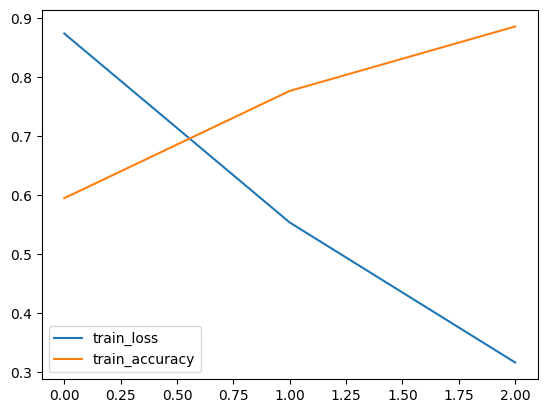

In [57]:
plt.plot(train_history.history['loss'], label='train_loss')
plt.plot(train_history.history['balanced_accuracy'], label='train_accuracy')
plt.legend()
plt.show()

In [44]:
predicted_raw = model.predict({'input_ids':x_test['input_ids'], 'attention_mask':x_test['attention_mask']})

15/15 [==============================] - 72s 5s/step


In [45]:
predicted_raw[0]

array([0.00337499, 0.00907248, 0.9875526 ], dtype=float32)

3 outputs for 3 neurons in the last layer, classification between 3 classes

In [48]:
y_predicted = np.argmax(predicted_raw, axis=1)

In [49]:
y_predicted

array([2, 0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 1, 1, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0,
       2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 0, 2,
       0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0,
       1, 2, 1, 2, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1,
       1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0,
       2, 1, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0,
       0, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0,

In [50]:
data_test.label

0      2
1      0
2      0
3      1
4      2
      ..
459    0
460    2
461    2
462    0
463    1
Name: label, Length: 464, dtype: int8

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(data_test.label, y_predicted))

              precision    recall  f1-score   support

           0       0.60      0.82      0.69       120
           1       0.80      0.63      0.71       175
           2       0.79      0.76      0.77       169

    accuracy                           0.73       464
   macro avg       0.73      0.74      0.72       464
weighted avg       0.75      0.73      0.73       464

